<a href="https://colab.research.google.com/github/antonsysoev/comp_tech2025/blob/main/Lecture_2_%D0%BF%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0%20%D0%B4%D0%BB%D1%8F%D1%8F%20%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D1%85%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
install.packages("outliers")
install.packages("EnvStats")
install.packages("car")
install.packages("leaps")
install.packages("bootstrap")
install.packages("glmnet")
install.packages("psych")
install.packages("caret")

library(outliers)
library(EnvStats)
library(car)
library(MASS)
library(leaps)
library(bootstrap)
library(glmnet)
library(dplyr)
library(psych)
library(caret)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpCiFApH/downloaded_packages’

(as ‘lib’ is unspecified)














	‘/tmp/RtmpCiFApH/downloaded_packages’

(as ‘lib’ is unspecified)















































































	‘/tmp/RtmpCiFApH/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpCiFApH/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpCiFApH/downloaded_packages’

(as ‘lib’ is unspecified)
























	‘/tmp/RtmpCiFApH/downloaded_packages’

(as ‘lib’ is unspecified)














	‘/tmp/RtmpCiFApH/downloaded_packages’

(as ‘lib’ is unspecified)













































































































	‘/tmp/RtmpCiFApH/downloaded_packages’

Attaching package: ‘EnvStats’



    predict, predict.lm



    print.default



Attaching package: ‘car’



    qqPlot


Attaching package: ‘MASS’



    boxcox




Attaching package: ‘dplyr’



    select



 

**Корректировка моделей**


Необычные наблюдения требуют отдельного изучения: либо потому, что они каким-то образом отличаются от прочих, либо потому, что они значительно влияют на общие результаты.

*Выбросы*

Характеризуются большими положительными или отрицательными остатками $\hat{Y_i} - Y_i$. Положительные остатки свидетельствуют о том, что модель недооценивает зависимую переменную, отрицательные остатки - признак переоценки.

In [ ]:
%%R
summary(state.x77) # датасет о штатах США
df <- state.x77
colnames(df)[4]  <- 'Life_Exp'
df <- as.data.frame(df)


In [ ]:
%%R
summary(df)

   Population        Income       Illiteracy       Life_Exp    
 Min.   :  365   Min.   :3098   Min.   :0.500   Min.   :67.96  
 1st Qu.: 1080   1st Qu.:3993   1st Qu.:0.625   1st Qu.:70.12  
 Median : 2838   Median :4519   Median :0.950   Median :70.67  
 Mean   : 4246   Mean   :4436   Mean   :1.170   Mean   :70.88  
 3rd Qu.: 4968   3rd Qu.:4814   3rd Qu.:1.575   3rd Qu.:71.89  
 Max.   :21198   Max.   :6315   Max.   :2.800   Max.   :73.60  
     Murder          HS Grad          Frost             Area       
 Min.   : 1.400   Min.   :37.80   Min.   :  0.00   Min.   :  1049  
 1st Qu.: 4.350   1st Qu.:48.05   1st Qu.: 66.25   1st Qu.: 36985  
 Median : 6.850   Median :53.25   Median :114.50   Median : 54277  
 Mean   : 7.378   Mean   :53.11   Mean   :104.46   Mean   : 70736  
 3rd Qu.:10.675   3rd Qu.:59.15   3rd Qu.:139.75   3rd Qu.: 81162  
 Max.   :15.100   Max.   :67.30   Max.   :188.00   Max.   :566432  


Статистические тесты для определения выбросов:

1. Тест Граббса

Тест Граббса позволяет определить, является ли самое большое или самое малое значение в наборе данных выбросом.

Тест Граббса выявляет один выброс за раз (наибольшее или наименьшее значение), поэтому нулевая и альтернативная гипотезы выглядят следующим образом:

$H_0:$ Наибольшее значение не является выбросом

$H_1:$ Наибольшее значение является выбросом

если мы хотим проверить наибольшее значение, или:

$H_0:$ Наименьшее значение не является выбросом

$H_1:$ Наименьшее значение является выбросом

если мы хотим проверить наименьшее значение.

Как и для любого статистического теста, если $p$-значение меньше выбранного порога значимости (обычно $α=0,05$), то нулевая гипотеза отвергается, и мы приходим к выводу, что наибольшее/наименьшее значение является выбросом. Напротив, если $p$-значение больше или равно уровню значимости, нулевая гипотеза не отвергается, и мы приходим к выводу, что на основании данных мы не отвергаем гипотезу о том, что наименьшее/наибольшее значение не является выбросом.

Обратите внимание, что тест Граббса не подходит для выборки размером 6 или менее ($n \le 6$).

Для выполнения теста Граббса в R мы используем функцию grubbs.test() из пакета {outliers}:

In [ ]:
%%R

grubbs <- grubbs.test(df$Population, opposite = FALSE)
grubbs


	Grubbs test for one outlier

data:  df$Population
G = 3.79698, U = 0.69977, p-value = 0.0009524
alternative hypothesis: highest value 21198 is an outlier



2. Тест Диксона

Обратите внимание, что тест Диксона наиболее полезен при небольшом размере выборки (обычно $n \le 25$).

Для выполнения теста Диксона в R мы используем функцию dixon.test() из пакета {outliers}. Однако мы ограничиваем наш набор данных 20 первыми наблюдениями, так как тест Диксона может быть выполнен только для небольшого размера выборки (R выдаст ошибку и примет только набор данных от 3 до 30 наблюдений):

In [ ]:
%%R

df_small <- df$Population[1:20]
dixon <- dixon.test(df_small)
dixon


	Dixon test for outliers

data:  df_small
Q = 0.63385, p-value < 2.2e-16
alternative hypothesis: highest value 21198 is an outlier



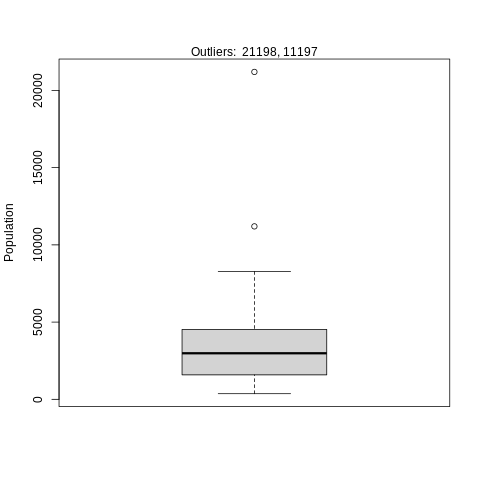

In [ ]:
%%R

out <- boxplot.stats(df_small)$out
boxplot(df_small,
  ylab = "Population"
)
mtext(paste("Outliers: ", paste(out, collapse = ", ")))

3. Тест Рознера

Тест Рознера на выбросы имеет следующие преимущества:

* он используется для обнаружения нескольких выбросов одновременно (в
отличие от теста Граббса и Диксона, который должен выполняться итеративно для отбора нескольких выбросов), и
* он разработан таким образом, чтобы избежать проблемы маскировки, когда выброс, близкий по значению к другому выбросу, может остаться незамеченным.

Для выполнения теста Рознера мы используем функцию rosnerTest() из пакета {EnvStats}. Эта функция требует как минимум 2 аргумента: данные и число предполагаемых выбросов $k$ (по умолчанию $k = 3$).

In [ ]:
%%R
rosner <- rosnerTest(df$Population, k = 10)
rosner

$distribution
[1] "Normal"

$statistic
     R.1      R.2      R.3      R.4      R.5      R.6      R.7      R.8 
3.796979 3.756750 2.705845 2.853780 2.941495 3.128699 2.854329 2.793984 
     R.9     R.10 
2.617622 1.995832 

$sample.size
[1] 50

$parameters
 k 
10 

$alpha
[1] 0.05

$crit.value
 lambda.1  lambda.2  lambda.3  lambda.4  lambda.5  lambda.6  lambda.7  lambda.8 
 3.128247  3.120128  3.111796  3.103243  3.094456  3.085425  3.076135  3.066572 
 lambda.9 lambda.10 
 3.056723  3.046571 

$n.outliers
[1] 6

$alternative
[1] "Up to 10 observations are not\n                                 from the same Distribution."

$method
[1] "Rosner's Test for Outliers"

$data
 [1]  3615   365  2212  2110 21198  2541  3100   579  8277  4931   868   813
[13] 11197  5313  2861  2280  3387  3806  1058  4122  5814  9111  3921  2341
[25]  4767   746  1544   590   812  7333  1144 18076  5441   637 10735  2715
[37]  2284 11860   931  2816   681  4173 12237  1203   472  4981  3559  1799
[49]  4589   

4. В пакете car также реализован статистический тест на выбросы. Функция outlierTest() вычисляет значение вероятности статистической ошибки первого
рода с поправкой Бонферрони для наибольшего остатка Стьюдента

In [ ]:
%%R
linear_model <- lm(Life_Exp ~., df)
summary(linear_model)


Call:
lm(formula = Life_Exp ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.48895 -0.51232 -0.02747  0.57002  1.49447 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.094e+01  1.748e+00  40.586  < 2e-16 ***
Population   5.180e-05  2.919e-05   1.775   0.0832 .  
Income      -2.180e-05  2.444e-04  -0.089   0.9293    
Illiteracy   3.382e-02  3.663e-01   0.092   0.9269    
Murder      -3.011e-01  4.662e-02  -6.459 8.68e-08 ***
`HS Grad`    4.893e-02  2.332e-02   2.098   0.0420 *  
Frost       -5.735e-03  3.143e-03  -1.825   0.0752 .  
Area        -7.383e-08  1.668e-06  -0.044   0.9649    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7448 on 42 degrees of freedom
Multiple R-squared:  0.7362,	Adjusted R-squared:  0.6922 
F-statistic: 16.74 on 7 and 42 DF,  p-value: 2.534e-10



In [ ]:
%%R
outlierTest(linear_model)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
       rstudent unadjusted p-value Bonferroni p
Hawaii 2.735242          0.0091673      0.45837


*Точки высокой напряженности*

Точки с высокой напряженностью – это выбросы в отношении других независимых пе-
ременных. Они характеризуются необычным сочетанием значений независимых переменных. Значение зависимой переменной не используется при вычислении напряженности. Идентифицируются при помощи показателя влияния (hat statisctic).

Для определенного набора данных среднее значение этой статистики вычисляется как $p/n$, где $p$ – это число параметров в модели (включая свободный член), $n$ – размер выборки. Наблюдения, для которых значение этой статистики превышает среднее в два или три раза, должны быть проанализированы.

In [ ]:
%%R

hat.plot <- function(fit) {
              p <- length(coefficients(fit))
              n <- length(fitted(fit))
              plot(hatvalues(fit), main="Index Plot of Hat Values")
              abline(h=c(2,3)*p/n, col="red", lty=2)
              identify(1:n, hatvalues(fit), names(hatvalues(fit)))
            }

integer(0)


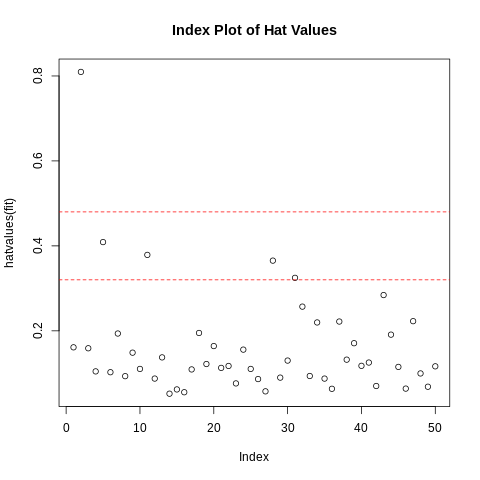

In [ ]:
%%R
hat.plot(linear_model)

*Влиятельные наблюдения*

Влиятельные наблюдения – это наблюдения, которые оказывают непропорционально
большое влияние на значения параметров модели. Существуют два метода обнаружения влиятельных наблюдений: расстояние Кука (или $D-$
статистика) и диаграммы добавленных переменных.

Значения расстояния Кука, превышающие $4/(n – k – 1)$, где $n$ – объем выборки, а $k$ – число независимых переменных, свидетельствуют о влиятельных наблюдениях.

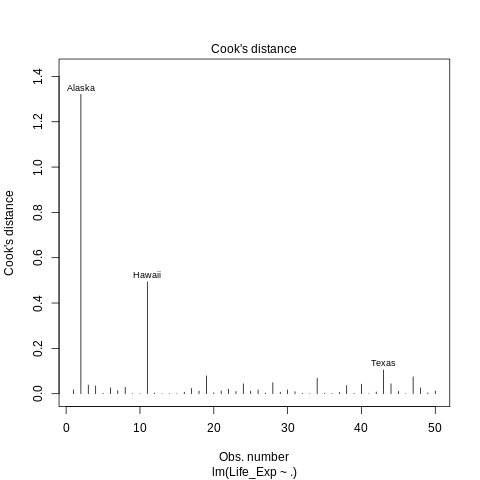

In [ ]:
%%R
cutoff <- 4/((nrow(df)-length(linear_model$coefficients)-2))
plot(linear_model, which=4, cook.levels=cutoff)

Для одной зависимой и $k$ независимых переменных создается $k$ диаграмм добавленных переменных.

Для каждой независимой переменной $X_k$ отображаются остатки от регрессии зависимой переменной по остальным $k – 1$ независимым переменным. Диаграммы добавленных переменных строятся при помощи функции avPlots() из пакета {car}

Прямая на каждой диаграмме – это регрессионный коэффициент для данной независимой переменной. Вклад влиятельных наблюдений можно оценить, если представить, как изменится линия, если удалить точку, соответствующую
данному наблюдению.

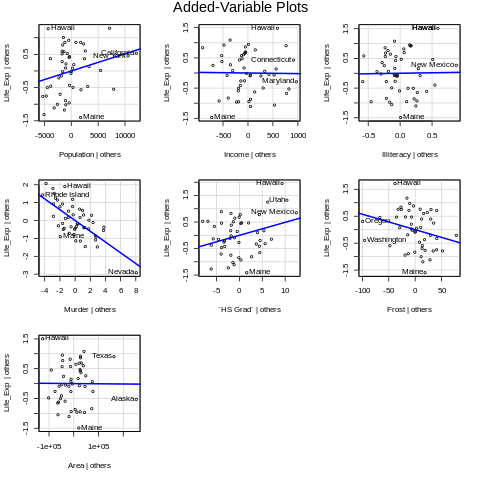

In [ ]:
%%R

avPlots(linear_model)


Можно свести информацию о выбросах, точках с высокой напряженностью и влиятельных наблюдениях на одну диаграмму при помощи функции influencePlot() из пакета {car}

              StudRes       Hat       CookD
Alaska     -1.6061632 0.8095223 1.320803928
California -0.1590567 0.4088569 0.002239186
Hawaii      2.7352416 0.3787617 0.493948906
Maine      -2.2322062 0.1218190 0.078915835


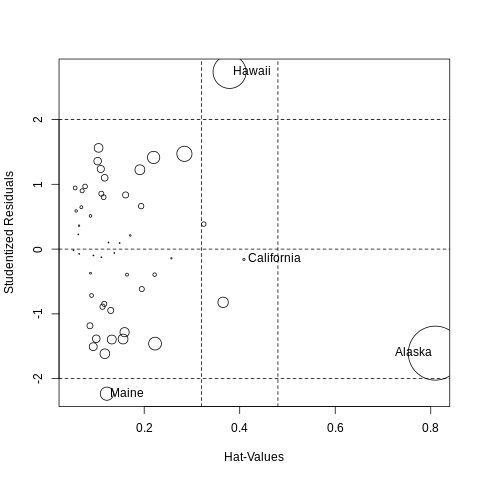

In [ ]:
%%R

influencePlot(linear_model)